In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
datapath = "../../../deeplearning/TensorFlow2.0_ResNet/dataset/"
print(os.path.exists(datapath))
image_dims = (180, 180)
batch_size = 16

True


In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(os.path.join(datapath, "train"),
                                             target_size = image_dims,
                                            batch_size = batch_size,
                                             class_mode = 'categorical',
                                            color_mode = 'rgb',
                                                   shuffle=True)
test_generator = test_datagen.flow_from_directory(os.path.join(datapath, "test"), 
                                                             target_size = image_dims,
                                                              batch_size = batch_size,
                                                             class_mode = 'binary', 
                                                             color_mode = 'rgb')
validation_generator = validation_datagen.flow_from_directory(os.path.join(datapath, "valid"), 
                                                     target_size = image_dims,
                                                      batch_size = batch_size,
                                                     class_mode = 'binary', 
                                                     color_mode = 'rgb',
                                                             shuffle=True)

Found 1488 images belonging to 2 classes.
Found 495 images belonging to 2 classes.
Found 498 images belonging to 2 classes.


In [4]:
import matplotlib.pyplot as plt
import numpy as np

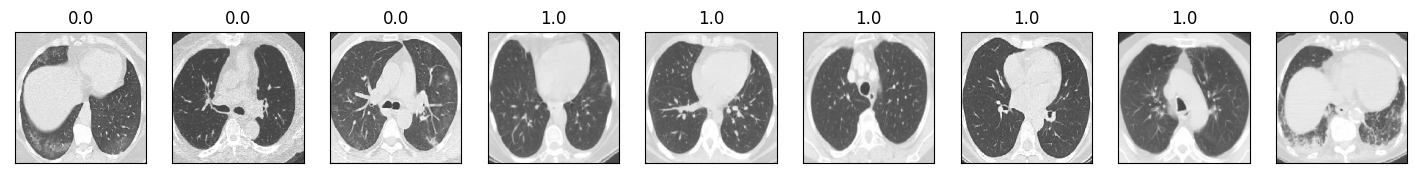

In [5]:
n = 10
plt.figure(figsize=(20, 4))
xtrain, ytrain = next(train_generator)
# samples = iter(enumerate(train_generator), n)
for i in range(1, n):
    ax = plt.subplot(1, n, i)
    plt.imshow(xtrain[i])
    ax.title.set_text(ytrain[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## callback for saving model with best weights

In [7]:
import tensorflow as tf
import keras

In [9]:
path = 'models/resnet/best'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                                                    filepath=path,
                                                    save_weights_only=False,
                                                    monitor='val_loss',
                                                    mode='min',
                                                    save_best_only=True)

## loading resnet50 and adding layers at the top

In [10]:
resnet = tf.keras.applications.ResNet50(weights='imagenet',
                                       input_shape=(180, 180, 3),
                                       include_top=False)
resnet.summary()

print("total layers in resnet50-{0}".format(len(resnet.layers)))

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 186, 186, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 90, 90, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 90, 90, 64)   256         ['conv1_conv[0][0]']      

In [11]:
resnet.trainable=False
x = resnet.layers[-1].output
x = keras.layers.Flatten()(x)
# x = keras.layers.Dense(1000, activation='relu')(x)
x = keras.layers.Dense(500, activation='relu')(x)
x = keras.layers.Dense(200, activation='relu')(x)
output = keras.layers.Dense(1)(x)
model = keras.Model(resnet.input, output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 186, 186, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 90, 90, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 90, 90, 64)   256         ['conv1_conv[0][0]']         

In [12]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=tf.keras.metrics.BinaryAccuracy(),
)

In [13]:
history = model.fit(train_generator,
                    epochs=15,
                    validation_data=validation_generator,
                   callbacks = [model_checkpoint_callback])

Epoch 1/15
24/24 [==============================] - ETA: 0s - loss: 146.8584 - binary_accuracy: 0.5047INFO:tensorflow:Assets written to: models/resnet/best/assets


/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.8/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


24/24 [==============================] - 125s 4s/step - loss: 146.8584 - binary_accuracy: 0.5047 - val_loss: 4.9160 - val_binary_accuracy: 0.5040
Epoch 2/15
24/24 [==============================] - ETA: 0s - loss: 2.0961 - binary_accuracy: 0.5054INFO:tensorflow:Assets written to: models/resnet/best/assets


/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.8/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


24/24 [==============================] - 98s 4s/step - loss: 2.0961 - binary_accuracy: 0.5054 - val_loss: 0.7814 - val_binary_accuracy: 0.4960
Epoch 3/15
24/24 [==============================] - ETA: 0s - loss: 0.4319 - binary_accuracy: 0.5128INFO:tensorflow:Assets written to: models/resnet/best/assets


/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.8/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


24/24 [==============================] - 100s 4s/step - loss: 0.4319 - binary_accuracy: 0.5128 - val_loss: 0.5449 - val_binary_accuracy: 0.4960
Epoch 4/15
24/24 [==============================] - ETA: 0s - loss: 0.2500 - binary_accuracy: 0.6001INFO:tensorflow:Assets written to: models/resnet/best/assets


/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.8/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


24/24 [==============================] - 96s 4s/step - loss: 0.2500 - binary_accuracy: 0.6001 - val_loss: 0.1954 - val_binary_accuracy: 0.6908
Epoch 5/15
24/24 [==============================] - ETA: 0s - loss: 0.1922 - binary_accuracy: 0.6983INFO:tensorflow:Assets written to: models/resnet/best/assets


/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.8/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


24/24 [==============================] - 94s 4s/step - loss: 0.1922 - binary_accuracy: 0.6983 - val_loss: 0.1797 - val_binary_accuracy: 0.7410
Epoch 6/15
24/24 [==============================] - 62s 3s/step - loss: 0.2015 - binary_accuracy: 0.6754 - val_loss: 0.1818 - val_binary_accuracy: 0.7189
Epoch 7/15
24/24 [==============================] - 62s 3s/step - loss: 0.1941 - binary_accuracy: 0.6902 - val_loss: 0.1943 - val_binary_accuracy: 0.6787
Epoch 8/15
24/24 [==============================] - ETA: 0s - loss: 0.1668 - binary_accuracy: 0.7567INFO:tensorflow:Assets written to: models/resnet/best/assets


/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.8/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


24/24 [==============================] - 99s 4s/step - loss: 0.1668 - binary_accuracy: 0.7567 - val_loss: 0.1537 - val_binary_accuracy: 0.7932
Epoch 9/15
24/24 [==============================] - 63s 3s/step - loss: 0.1838 - binary_accuracy: 0.7379 - val_loss: 0.1559 - val_binary_accuracy: 0.7831
Epoch 10/15
24/24 [==============================] - 62s 3s/step - loss: 0.2149 - binary_accuracy: 0.6727 - val_loss: 0.2118 - val_binary_accuracy: 0.6486
Epoch 11/15
24/24 [==============================] - 62s 3s/step - loss: 0.1821 - binary_accuracy: 0.7258 - val_loss: 0.2300 - val_binary_accuracy: 0.6486
Epoch 12/15
24/24 [==============================] - 62s 3s/step - loss: 0.3437 - binary_accuracy: 0.6042 - val_loss: 0.3558 - val_binary_accuracy: 0.5341
Epoch 13/15
24/24 [==============================] - 62s 3s/step - loss: 0.2254 - binary_accuracy: 0.7036 - val_loss: 0.2132 - val_binary_accuracy: 0.6546
Epoch 14/15
24/24 [==============================] - ETA: 0s - loss: 0.1695 - binar

/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.8/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


24/24 [==============================] - 95s 4s/step - loss: 0.1695 - binary_accuracy: 0.7446 - val_loss: 0.1285 - val_binary_accuracy: 0.8454
Epoch 15/15
24/24 [==============================] - 62s 3s/step - loss: 0.1600 - binary_accuracy: 0.7675 - val_loss: 0.1325 - val_binary_accuracy: 0.8313


In [14]:
test_loss, test_acc = model.evaluate(test_generator)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

8/8 [==============================] - 19s 2s/step - loss: 0.1371 - binary_accuracy: 0.8182
Accuracy: 0.8181818127632141
Loss:  0.1370541751384735


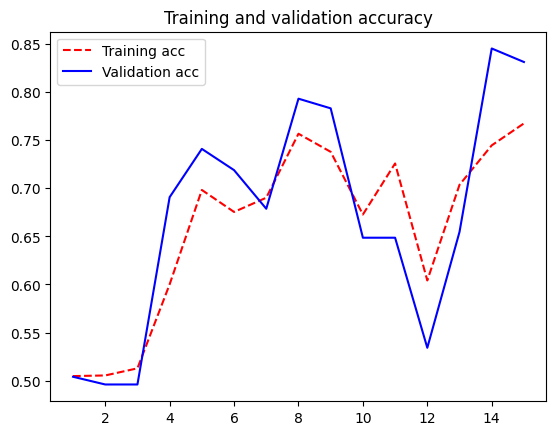

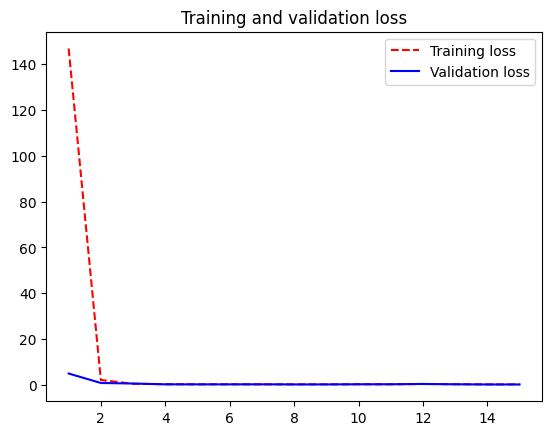

In [15]:
def plot_accuracy_and_loss(history):
    acc = history.history['binary_accuracy']
    val_acc = history.history['val_binary_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, '--r', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, '--r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

plot_accuracy_and_loss(history)

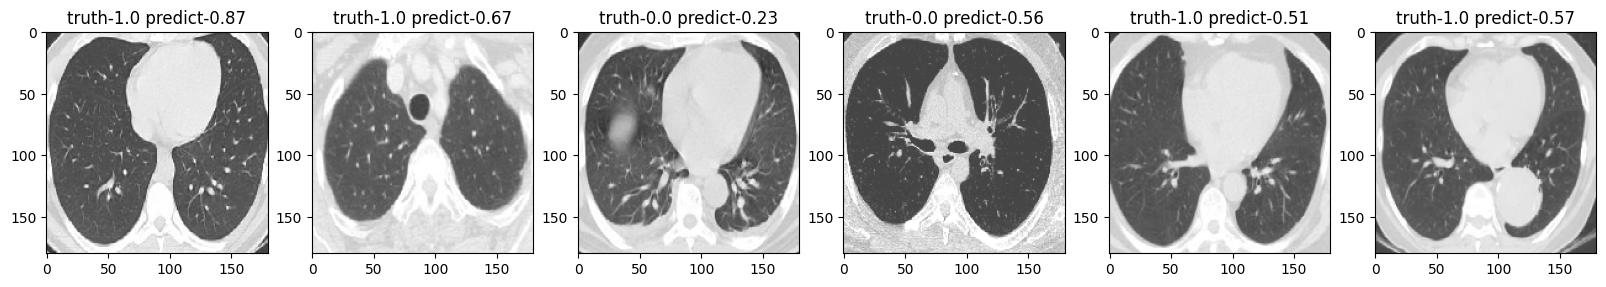

In [16]:
xtest, ytest = next(test_generator)
predictions = model.predict(xtest)
predictions = ['%.2f' %x for x in predictions] 

start = 50
n = 6
plt.figure(figsize=(20, 4))
for i in range(start, start+n):
    ax = plt.subplot(1, n, i-start+1)
    plt.imshow(xtest[i])
    plt.gray()
    ax.title.set_text("truth-{0} predict-{1}".format((ytest[i]), (predictions[i]) ) )
    
plt.show()

In [17]:
# model.save("models/resnet/180-500-adam-mse(batch_size-64)")

In [18]:
best_model = tf.keras.models.load_model("models/resnet/best")
test_loss, test_acc = best_model.evaluate(test_generator)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)


8/8 [==============================] - 16s 2s/step - loss: 0.1318 - binary_accuracy: 0.8242
Accuracy: 0.8242424130439758
Loss:  0.1318398416042328
